In [1]:
import numpy as np
import matplotlib.pyplot as plt
class parton():
    def __init__(self, pt, eta, phi, mass, pdgid):
        self.pt = pt 
        self.eta = eta
        self.phi = phi
        self.mass = mass
        self.pdgid = pdgid

class jet():
    def __init__(self, pt, eta, phi, mass):
        self.pt = pt 
        self.eta = eta
        self.phi = phi
        self.mass = mass

class jet_cand_properties_del():
    def __init__(self, idx_1, idx_2):
        self.idx_1 = idx_1
        self.idx_2 = idx_2
        self.pt = jet_del.pt[self.idx_1][self.idx_2]
        self.eta = jet_del.eta[self.idx_1][self.idx_2]
        self.phi = jet_del.phi[self.idx_1][self.idx_2]
        self.mass = jet_del.mass[self.idx_1][self.idx_2]
        # scale = -0.0008228230613626063 * self.pt - 0.051359995969670155
        # scale = 1 - (scale/2)
        scale = 1

        tmp_px = self.pt*np.cos(self.phi)
        tmp_py = self.pt*np.sin(self.phi)
        tmp_pz = self.pt*np.sinh(self.eta)

        self.px = tmp_px*scale
        self.py = tmp_py*scale
        self.pz = tmp_pz*scale
        self.e = np.sqrt( (self.px**2 + self.py**2 + self.pz**2) + self.mass**2 )
        
class jet_cand_properties_chi2():
    def __init__(self, idx_1, idx_2):
        self.idx_1 = idx_1
        self.idx_2 = idx_2
        self.pt = jet_chi2.pt[self.idx_1][self.idx_2]
        self.eta = jet_chi2.eta[self.idx_1][self.idx_2]
        self.phi = jet_chi2.phi[self.idx_1][self.idx_2]
        self.mass = jet_chi2.mass[self.idx_1][self.idx_2]
        # scale = -0.0008228230613626063 * self.pt - 0.051359995969670155
        # scale = 1 - (scale/2)
        scale = 1

        tmp_px = self.pt*np.cos(self.phi)
        tmp_py = self.pt*np.sin(self.phi)
        tmp_pz = self.pt*np.sinh(self.eta)

        self.px = tmp_px*scale
        self.py = tmp_py*scale
        self.pz = tmp_pz*scale
        self.e = np.sqrt( (self.px**2 + self.py**2 + self.pz**2) + self.mass**2 )

def cal_two_parton_inv(jet1, jet2):
    part_1 = (jet1.e + jet2.e)**2
    part_2 = (jet1.px + jet2.px)**2
    part_3 = (jet1.py + jet2.py)**2
    part_4 = (jet1.pz + jet2.pz)**2
    return np.sqrt( part_1 - part_2 - part_3 - part_4 )

def cal_three_parton_inv(jet1, jet2, jet3):
    part_1 = (jet1.e + jet2.e + jet3.e)**2
    part_2 = (jet1.px + jet2.px + jet3.px)**2
    part_3 = (jet1.py + jet2.py + jet3.py)**2
    part_4 = (jet1.pz + jet2.pz + jet3.pz)**2
    return np.sqrt( part_1 - part_2 - part_3 - part_4 )

In [2]:
delta = np.load("ttH_new.npz", allow_pickle=True)
chi2 = np.load("ttH_new_chi2.npz", allow_pickle=True)

In [3]:
parton_del = parton(delta['parton_pt'][:], delta['parton_eta'][:], delta['parton_phi'][:], delta['parton_mass'][:], delta['parton_pdgid'][:])
jet_del = jet(delta['jet_pt'][:], delta['jet_eta'][:], delta['jet_phi'][:], delta['jet_mass'][:])
jet_parton_index_del = delta['jet_parton_index'][:]
parton_jet_index_del = delta['parton_jet_index'][:]
N_match_top_del = delta['N_match_top_in_event'][:]
N_match_higgs_in_event_del = delta['N_match_higgs_in_event'][:]

parton_chi2 = parton(chi2['parton_pt'][:], chi2['parton_eta'][:], chi2['parton_phi'][:], chi2['parton_mass'][:], chi2['parton_pdgid'][:])
jet_chi2 = jet(chi2['jet_pt'][:], chi2['jet_eta'][:], chi2['jet_phi'][:], chi2['jet_mass'][:])
jet_parton_index_chi2 = chi2['jet_parton_index'][:]
parton_jet_index_chi2 = chi2['parton_jet_index'][:]
N_match_top_chi2 = chi2['N_match_top_in_event'][:]
N_match_higgs_in_event_chi2 = chi2['N_match_higgs_in_event'][:]

In [4]:
top_inv_del = []
tbar_inv_del = []
W_plus_inv_del = []
W_minus_inv_del = []
higgs_inv_del = []
for i in range(len(jet_parton_index_del)):
    if N_match_top_del[i] == 2 and N_match_higgs_in_event_del[i] == 1:
        for j in range(len(jet_parton_index_del[i])):
            if jet_parton_index_del[i][j] == 0:
                bjet_1 = jet_cand_properties_del(i,j)
            elif jet_parton_index_del[i][j] == 1:
                jet_1 = jet_cand_properties_del(i,j)
            elif jet_parton_index_del[i][j] == 2:
                jet_2 = jet_cand_properties_del(i,j)
            elif jet_parton_index_del[i][j] == 3:
                bjet_2 = jet_cand_properties_del(i,j)
            elif jet_parton_index_del[i][j] == 4:
                jet_3 = jet_cand_properties_del(i,j)
            elif jet_parton_index_del[i][j] == 5:
                jet_4 = jet_cand_properties_del(i,j)
            elif jet_parton_index_del[i][j] == 6:
                b_jet_3 = jet_cand_properties_del(i,j)
            elif jet_parton_index_del[i][j] == 7:
                b_jet_4 = jet_cand_properties_del(i,j)
            else : pass
        
        top_inv_del.append(cal_three_parton_inv(bjet_1, jet_1, jet_2))
        tbar_inv_del.append(cal_three_parton_inv(bjet_2, jet_3, jet_4))
        W_plus_inv_del.append(cal_two_parton_inv(jet_1, jet_2))
        W_minus_inv_del.append(cal_two_parton_inv(jet_3, jet_4))
        higgs_inv_del.append(cal_two_parton_inv(b_jet_3, b_jet_4))
        
top_inv_chi2 = []
tbar_inv_chi2 = []
W_plus_inv_chi2 = []
W_minus_inv_chi2 = []
higgs_inv_chi2 = []
for i in range(len(jet_parton_index_chi2)):
    if N_match_top_chi2[i] == 2 and N_match_higgs_in_event_chi2[i] == 1:
        for j in range(len(jet_parton_index_chi2[i])):
            if jet_parton_index_chi2[i][j] == 0:
                bjet_1 = jet_cand_properties_chi2(i,j)
            elif jet_parton_index_chi2[i][j] == 1:
                jet_1 = jet_cand_properties_chi2(i,j)
            elif jet_parton_index_chi2[i][j] == 2:
                jet_2 = jet_cand_properties_chi2(i,j)
            elif jet_parton_index_chi2[i][j] == 3:
                bjet_2 = jet_cand_properties_chi2(i,j)
            elif jet_parton_index_chi2[i][j] == 4:
                jet_3 = jet_cand_properties_chi2(i,j)
            elif jet_parton_index_chi2[i][j] == 5:
                jet_4 = jet_cand_properties_chi2(i,j)
            elif jet_parton_index_chi2[i][j] == 6:
                b_jet_3 = jet_cand_properties_chi2(i,j)
            elif jet_parton_index_chi2[i][j] == 7:
                b_jet_4 = jet_cand_properties_chi2(i,j)
            else : pass
        
        top_inv_chi2.append(cal_three_parton_inv(bjet_1, jet_1, jet_2))
        tbar_inv_chi2.append(cal_three_parton_inv(bjet_2, jet_3, jet_4))
        W_plus_inv_chi2.append(cal_two_parton_inv(jet_1, jet_2))
        W_minus_inv_chi2.append(cal_two_parton_inv(jet_3, jet_4))
        higgs_inv_chi2.append(cal_two_parton_inv(b_jet_3, b_jet_4))

In [5]:
def plot_fn(line_1, line_2, line_3, line_4, line_5):
    plt.figure(figsize=(10,8))
    plt.hist(line_1, range=(0, 210), bins=70, label='Invariant mass of reconstructed top.', histtype="stepfilled", stacked=True, alpha=0.5)
    plt.hist(line_2, range=(0, 210), bins=70, label='Invariant mass of reconstructed anti-top.', histtype="stepfilled", stacked=True, alpha=0.5)
    plt.hist(line_3, range=(0, 210), bins=105, label='Invariant mass of reconstructed W+ boson.', histtype="stepfilled", stacked=True, alpha=0.5)
    plt.hist(line_4, range=(0, 210), bins=105, label='Invariant mass of reconstructed W- boson.', histtype="stepfilled", stacked=True, alpha=0.5)
    plt.hist(line_5, range=(0, 210), bins=105, label='Invariant mass of reconstructed higgs boson.', histtype="stepfilled", stacked=True, alpha=0.5)
    plt.legend(loc='upper right')
    plt.xlabel("Invariant mass(GeV)")
    plt.ylabel("NUmber of events.")
    plt.title(r'Invariant mass distribution of $\chi^{2}$ reconstruction')

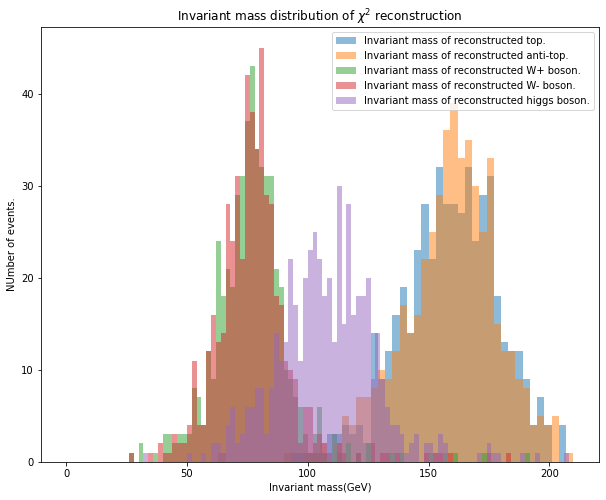

In [6]:
plot_fn(top_inv_del, tbar_inv_del, W_plus_inv_del, W_minus_inv_del, higgs_inv_del)

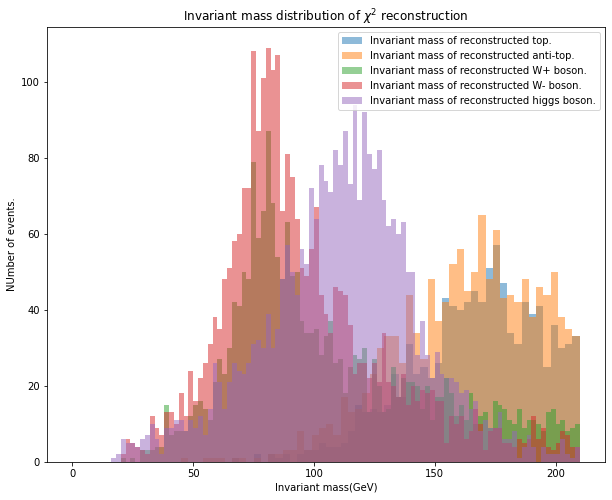

In [7]:
plot_fn(top_inv_chi2, tbar_inv_chi2, W_plus_inv_chi2, W_minus_inv_chi2, higgs_inv_chi2)